In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")


##Load data to python environment

In [59]:
df = pd.read_csv('/content/credit.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


##Shape of the data

In [60]:
df.shape

(100000, 28)

***The data contains 1 lakh rows and 28 columns.***

##Checking info

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

***There are 21 numerical features (18 float and 3 integer) and 7 categorical features in the data.***

##Check for Null Values

In [62]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

***There are no null values in the data***

##Check for statistical summary

In [63]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


##Check for Unique values


In [64]:
(df.nunique()).sort_values(ascending=False)

ID                          100000
Credit_Utilization_Ratio    100000
Monthly_Balance              98494
Monthly_Inhand_Salary        13241
SSN                          12500
Customer_ID                  12500
Annual_Income                12488
Amount_invested_monthly      12261
Outstanding_Debt             12203
Total_EMI_per_month          11890
Name                         10128
Type_of_Loan                  6261
Changed_Credit_Limit          3452
Credit_History_Age             404
Delay_from_due_date             63
Age                             43
Interest_Rate                   34
Num_of_Delayed_Payment          26
Num_Credit_Inquiries            18
Occupation                      15
Num_Bank_Accounts               12
Num_Credit_Card                 12
Num_of_Loan                     10
Month                            8
Payment_Behaviour                6
Credit_Mix                       3
Payment_of_Min_Amount            3
Credit_Score                     3
dtype: int64

***ID and Credit_Utilization_Ratio has all unique values***

##Check for duplicates

In [65]:
df.duplicated().sum()

0

***No duplicates***

##Exploratory Data Analysis

##Check for Outliers

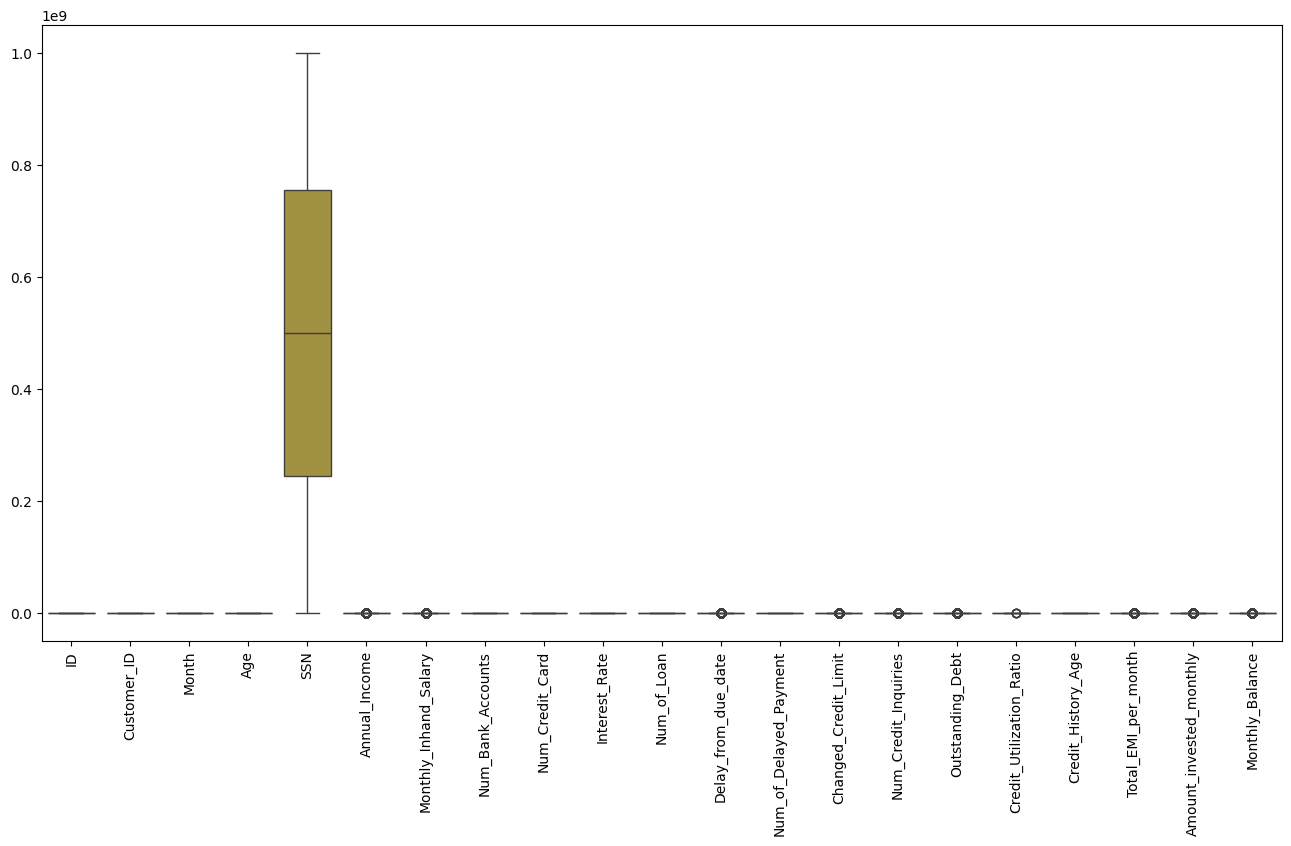

In [66]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Outliers are present in 10 features***

In [67]:
def percentage_with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)

def percentage_without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

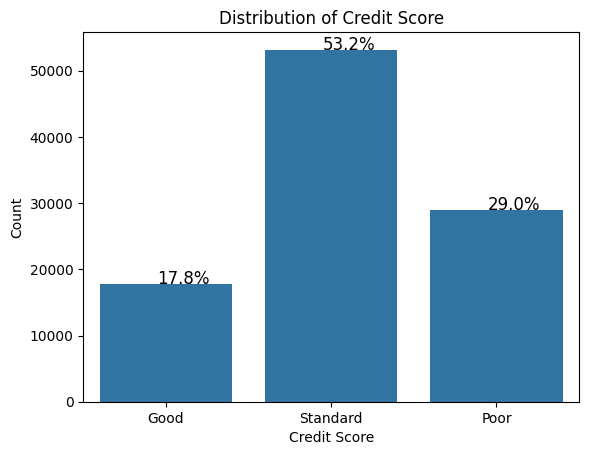

In [68]:
ax=sns.countplot(x='Credit_Score',data=df)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
percentage_without_hue(ax, df['Credit_Score'])
plt.show()

***Inference:The Target variable Credit Score is imbalanced.38% are Good,53% are Standard and 29% are Poor.***

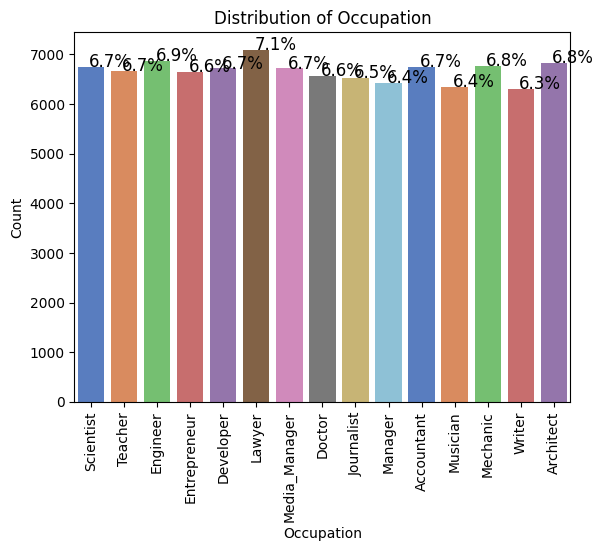

In [69]:
ax = sns.countplot(x = df['Occupation'],palette = "muted")
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation = 90)
percentage_without_hue(ax, df['Occupation'])
plt.show()

***Inference:Lawyers are more.***

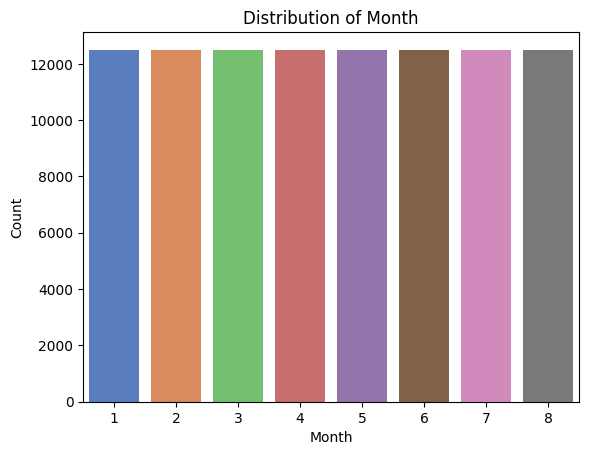

In [70]:
sns.countplot(x = df['Month'],palette = "muted")
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

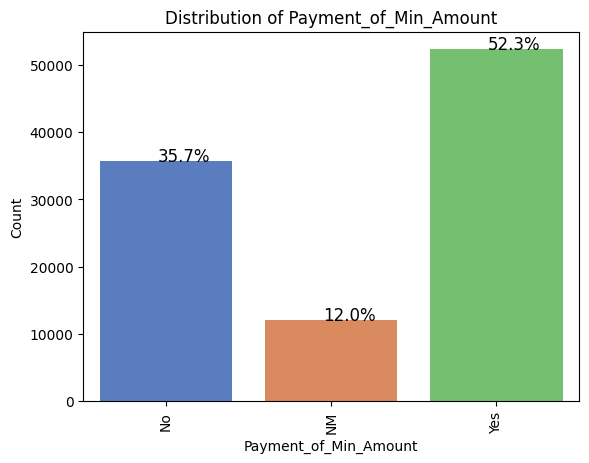

In [71]:
ax = sns.countplot(x = df['Payment_of_Min_Amount'],palette = "muted")
plt.title('Distribution of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation = 90)
percentage_without_hue(ax, df['Payment_of_Min_Amount'])
plt.show()

**Inference:This indicates that the majority of customers pay at least the minimum amount, while a significant portion (35.7%) do not, and a notable minority (12.0%) have an "NM" value, which we assume to be "Not Mentioned" or "No Minimum.**

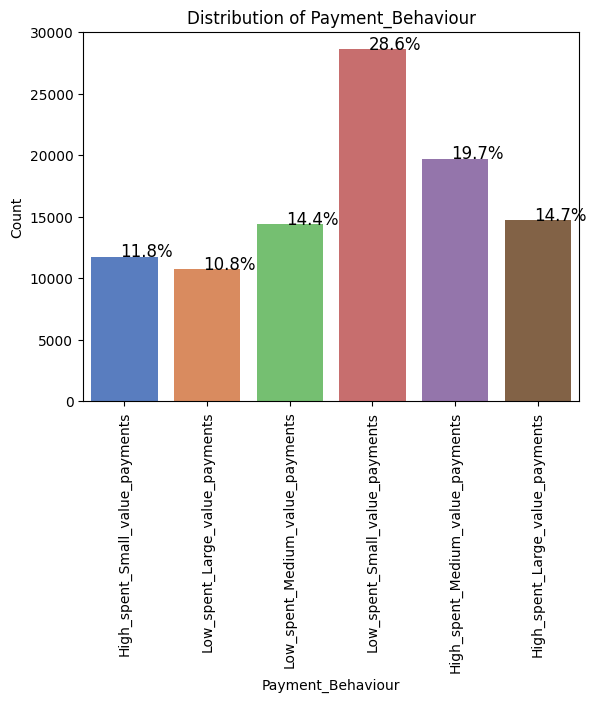

In [72]:
ax = sns.countplot(x = df['Payment_Behaviour'],palette = "muted")
plt.title('Distribution of Payment_Behaviour')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation = 90)
percentage_without_hue(ax, df['Payment_Behaviour'])
plt.show()

***Inference:Low spent small value payments are more(29%)***

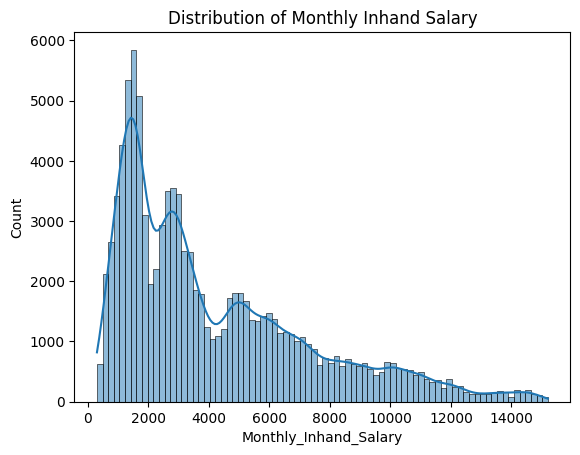

In [73]:
sns.histplot(df['Monthly_Inhand_Salary'], kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

***Inference:Distribution of Monthly inhand salary is skewed.Most of the customers have low Monthly inhand salary***

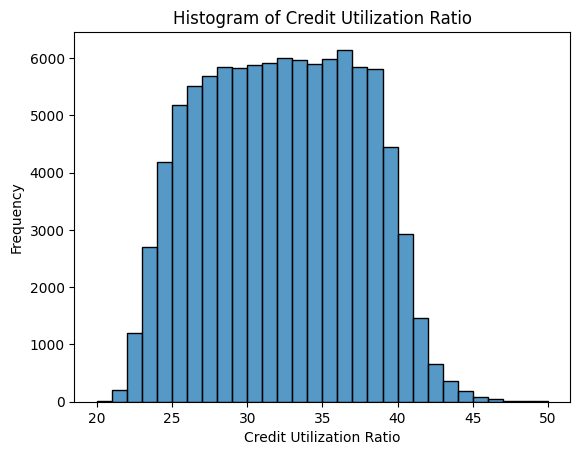

In [74]:
# Histogram of a column
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=False)
plt.title('Histogram of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

***Inference:The distribution is normal.***

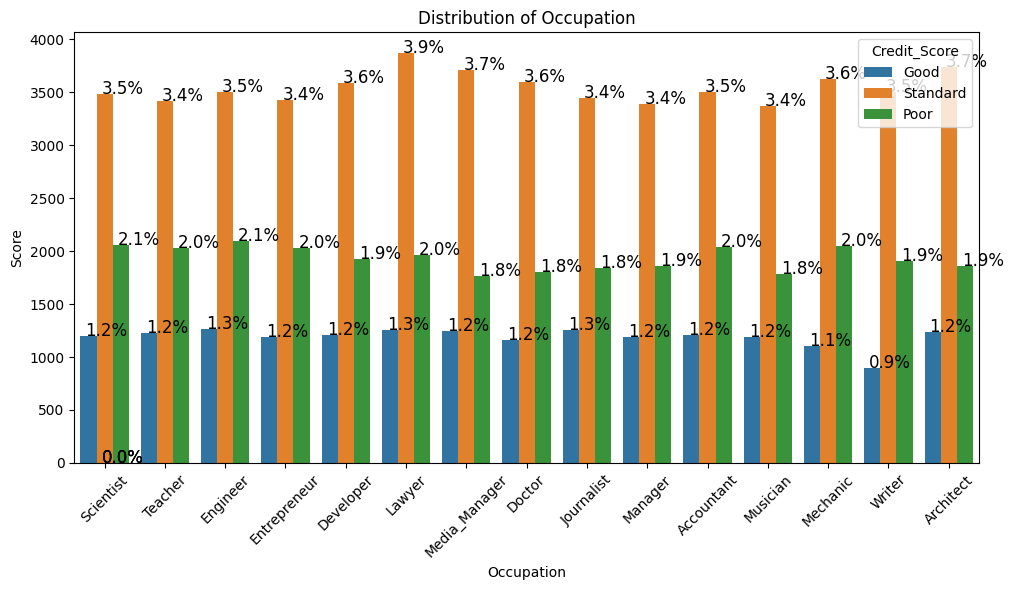

In [75]:
# Plot Occupation vs. Credit score
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score', loc='upper right')
plt.tight_layout()
percentage_without_hue(ax,df.Occupation)
plt.show()

***Inference:Lawyers Posses Standard Credit Score (3.9%) than others.Good credit score is with Engineer,Lawyer and Manager(1.3%) and low for Writer(.9%). Scientist and Engineer posses Poor Credit score(2.1%) than others.***

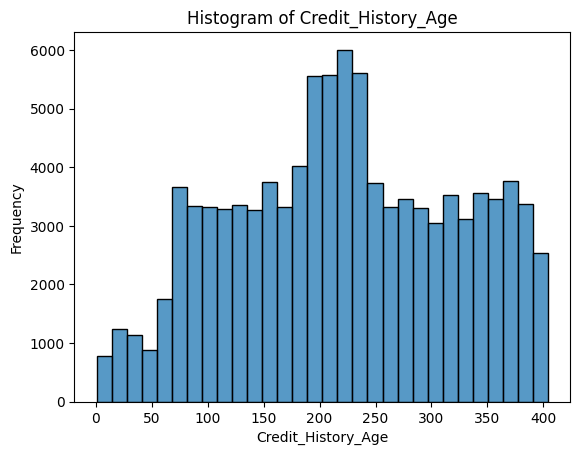

In [76]:
# Histogram of a column
sns.histplot(df['Credit_History_Age'], bins=30, kde=False)
plt.title('Histogram of Credit_History_Age')
plt.xlabel('Credit_History_Age')
plt.ylabel('Frequency')
plt.show()

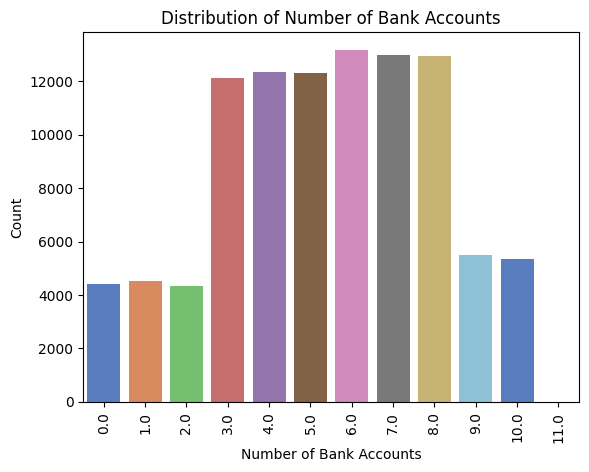

In [77]:
sns.countplot(x = df['Num_Bank_Accounts'],palette = "muted")
plt.title('Distribution of Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

***Inference:Majority of customers has no. of bank accounts between 3 to 8***

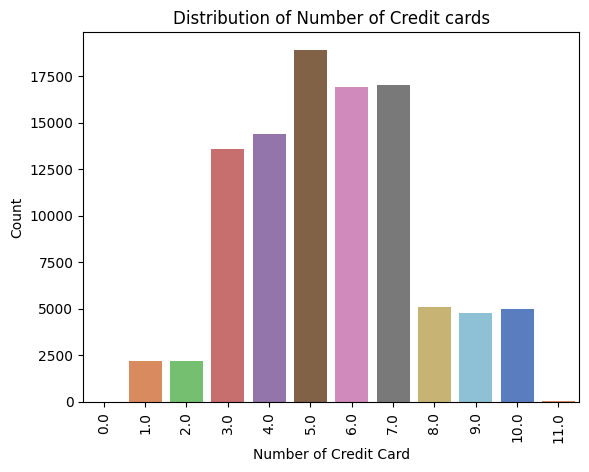

In [78]:
sns.countplot(x = df['Num_Credit_Card'],palette = "muted")
plt.title('Distribution of Number of Credit cards')
plt.xlabel('Number of Credit Card')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

***Inference:Number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5***

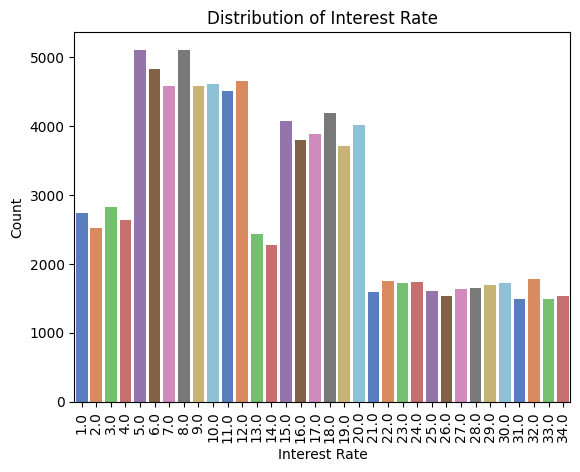

In [79]:
sns.countplot(x = df['Interest_Rate'],palette = "muted")
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

***Inference:Interest rate ranges from 1% to 34%***

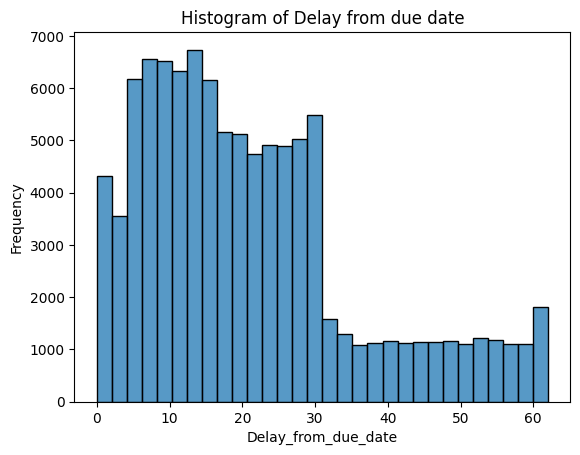

In [80]:
# Histogram of a column
sns.histplot(df['Delay_from_due_date'], bins=30, kde=False)
plt.title('Histogram of Delay from due date')
plt.xlabel('Delay_from_due_date')
plt.ylabel('Frequency')
plt.show()

***Inference:Delay from due date is concentrated between 0 to 30 days***

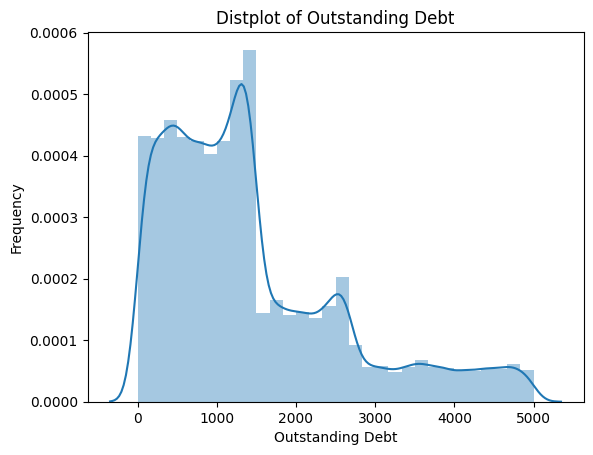

In [81]:
# Distplot of Outstanding Debt
sns.distplot(df['Outstanding_Debt'], bins=30, kde=True)
plt.title('Distplot of Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.ylabel('Frequency')
plt.show()

***Inference: The distribution is skewed.***

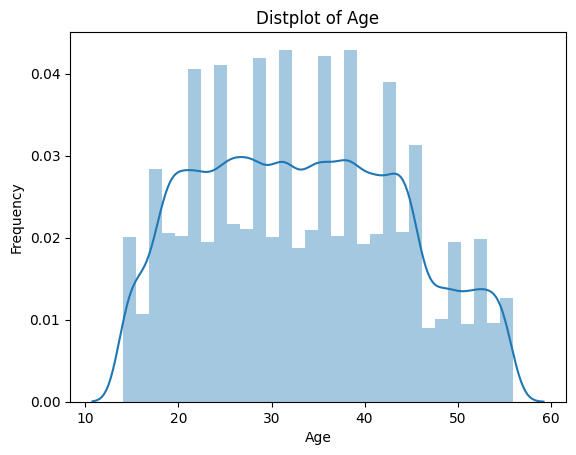

In [82]:
# Distplot of Age
sns.distplot(df['Age'], bins=30, kde=True)
plt.title('Distplot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

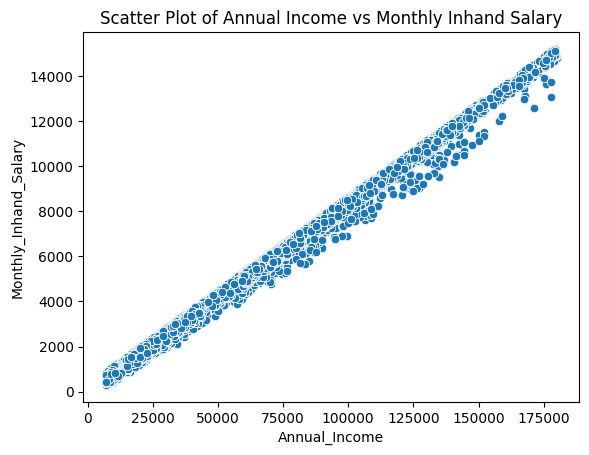

In [83]:
# Bivariate Analysis
sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', data=df)
plt.title('Scatter Plot of Annual Income vs Monthly Inhand Salary')
plt.show()

***Inference:As Annual income increases Monthly inhand salary also increases***

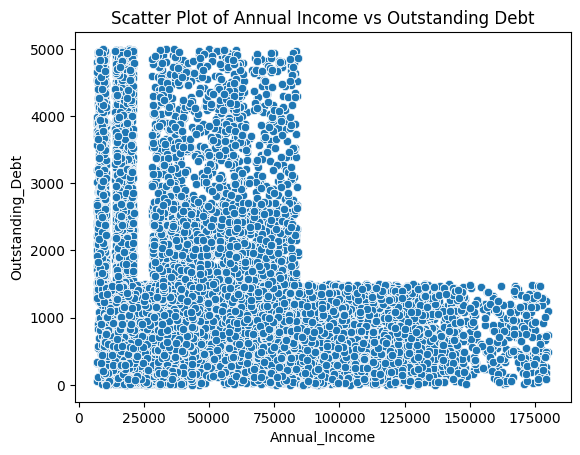

In [84]:
# Bivariate Analysis
ax=sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=df)
plt.title('Scatter Plot of Annual Income vs Outstanding Debt')
plt.show()

***Inference:Outstanading debt is low for those who have highest annual income.***

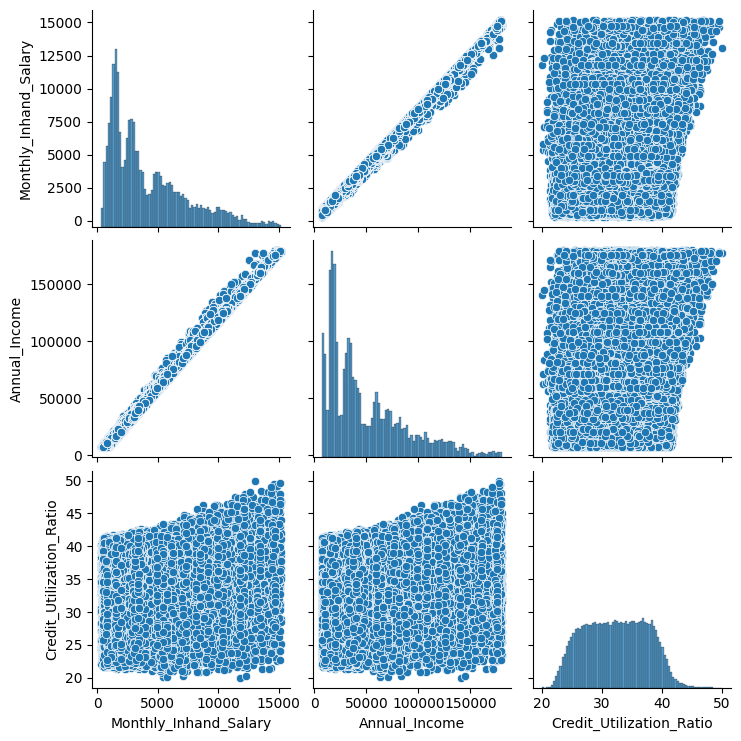

In [85]:
# Pair plot of selected columns
sns.pairplot(df[['Monthly_Inhand_Salary', 'Annual_Income', 'Credit_Utilization_Ratio', 'Credit_Score']])
plt.show()

##Correlation

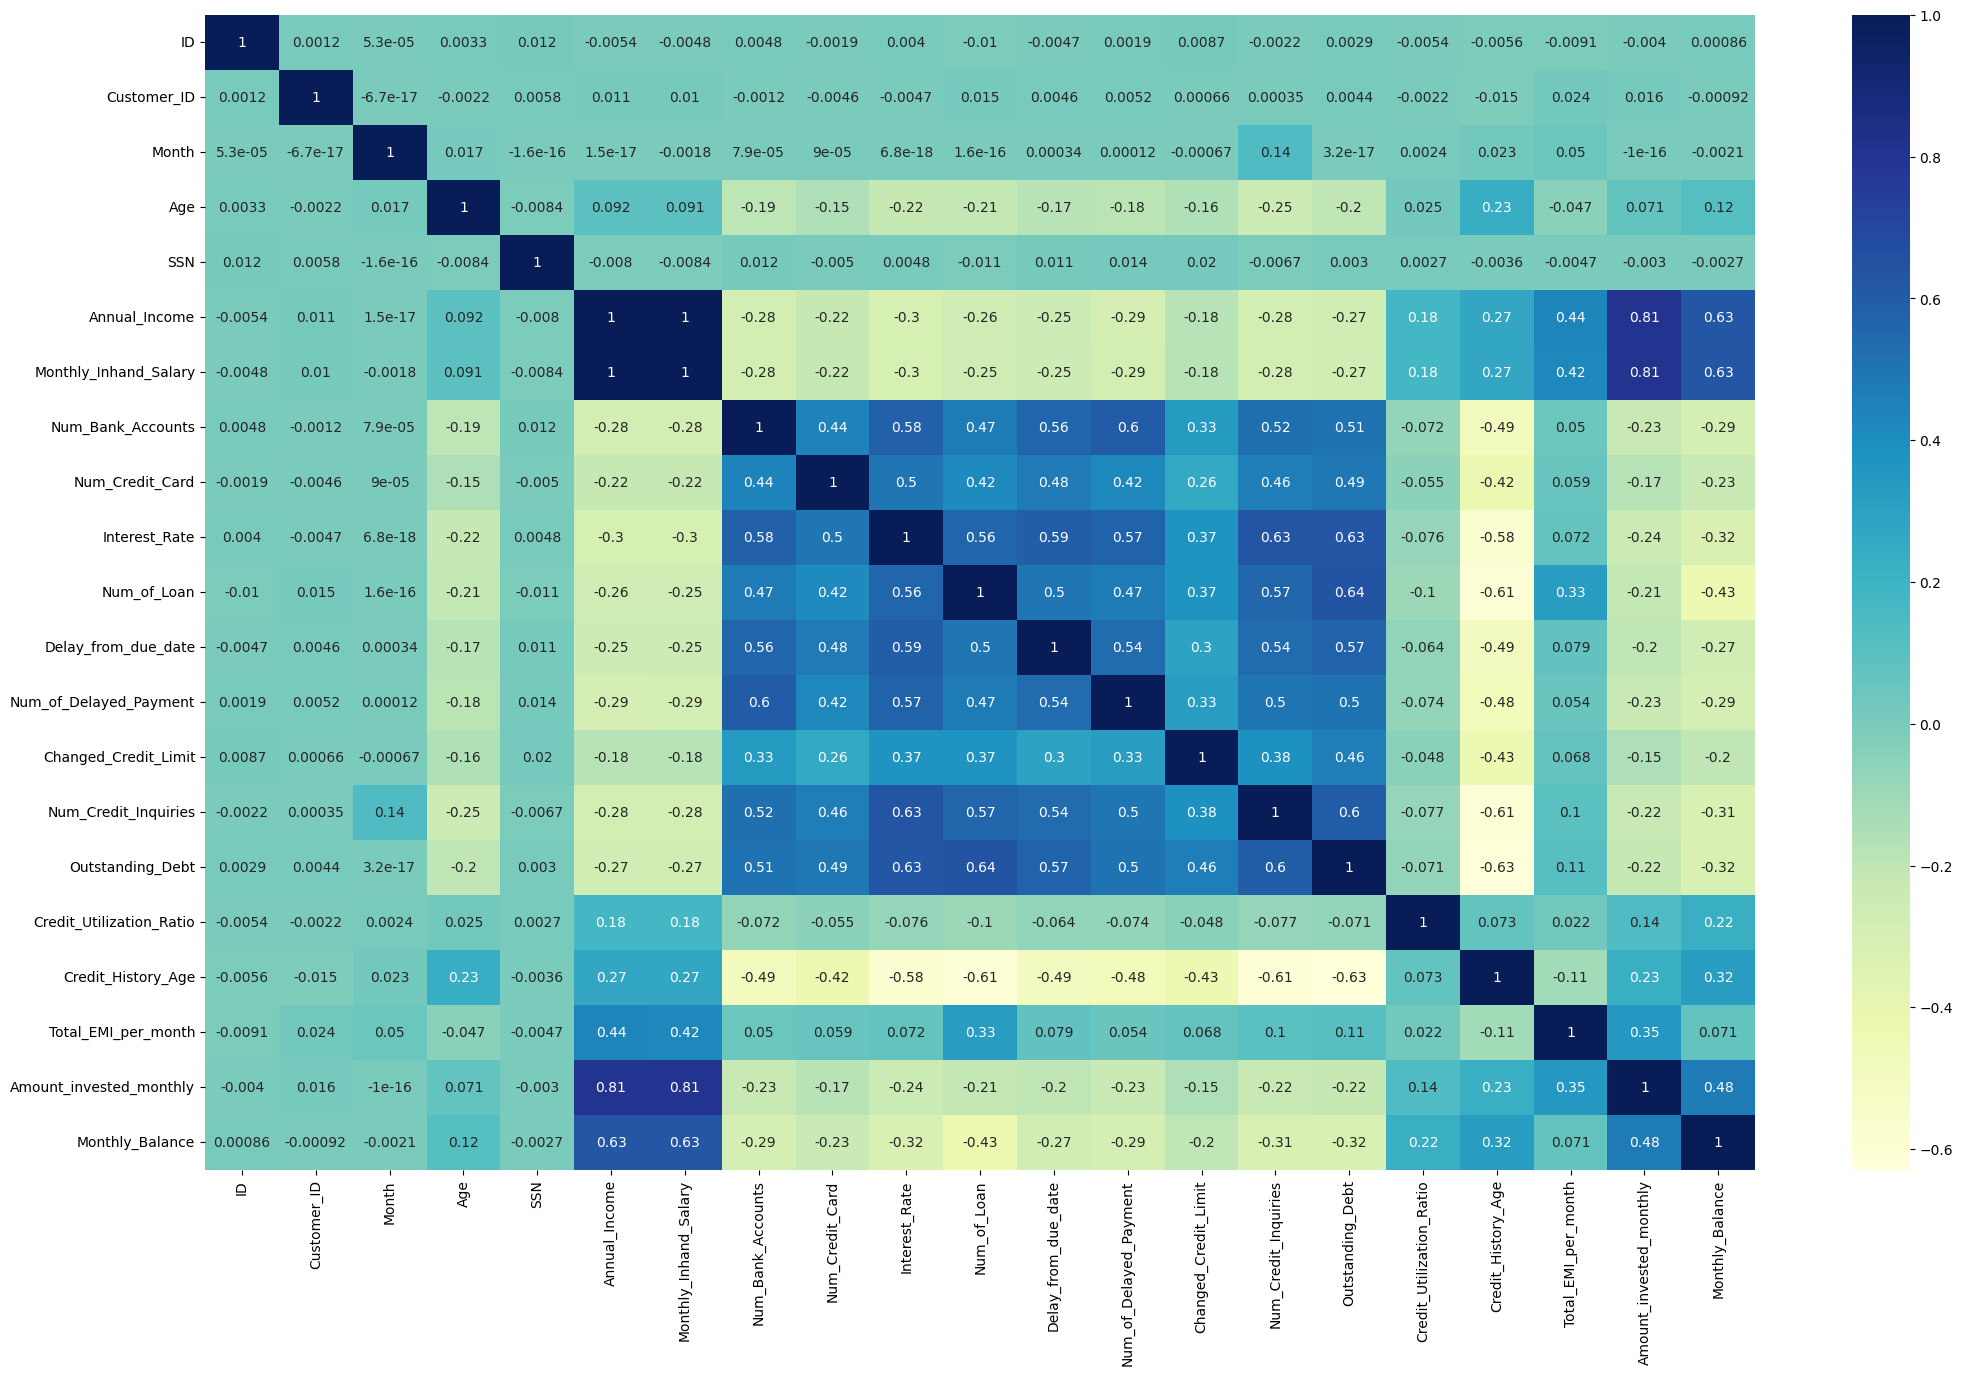

In [86]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.select_dtypes(('float','int64')).corr(),cmap='YlGnBu',annot=True)
plt.show()

***Amount_invested_monthly and Monthly_inhand_Salary and Amount_invested_monthly and Annual_Income posses the correlation value greater than 0.8.***

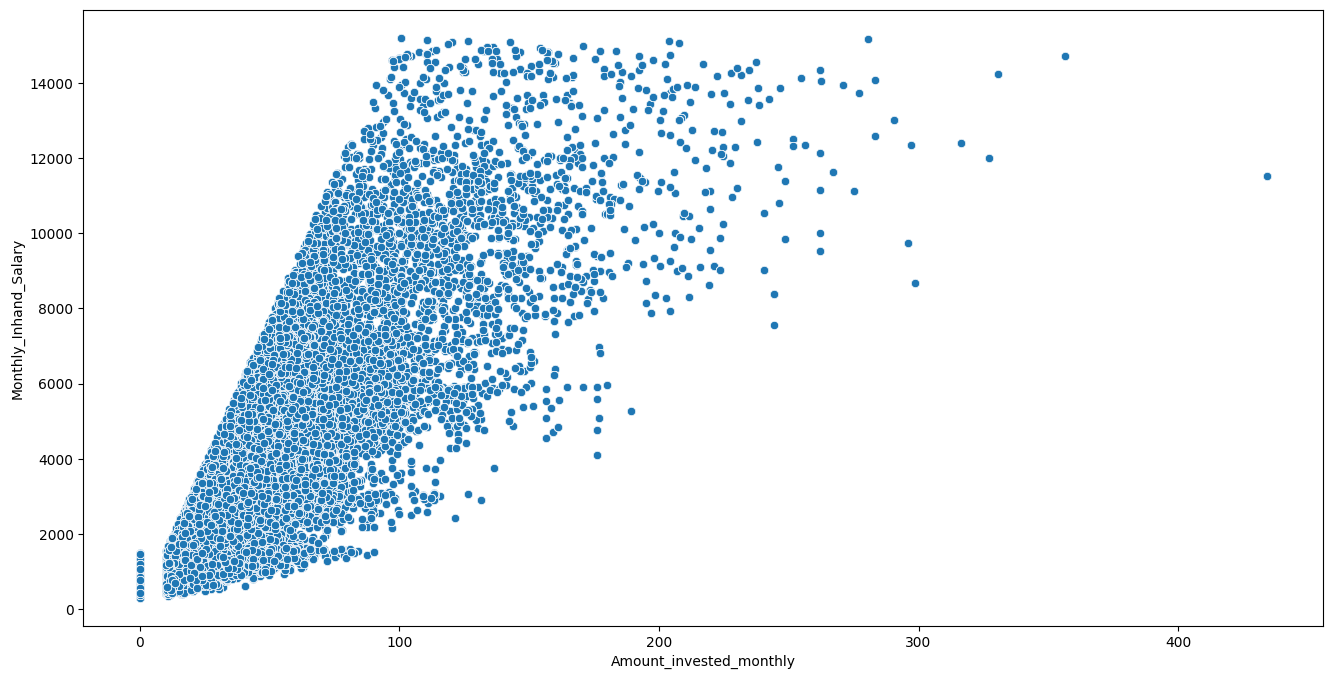

In [87]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Amount_invested_monthly',y='Monthly_Inhand_Salary',data=df)
plt.show()

***Inference : Amount_invested_monthly Amount and Monthly_Inhand_Salary follows a positive linear relationship, as one increases other one also increases.***

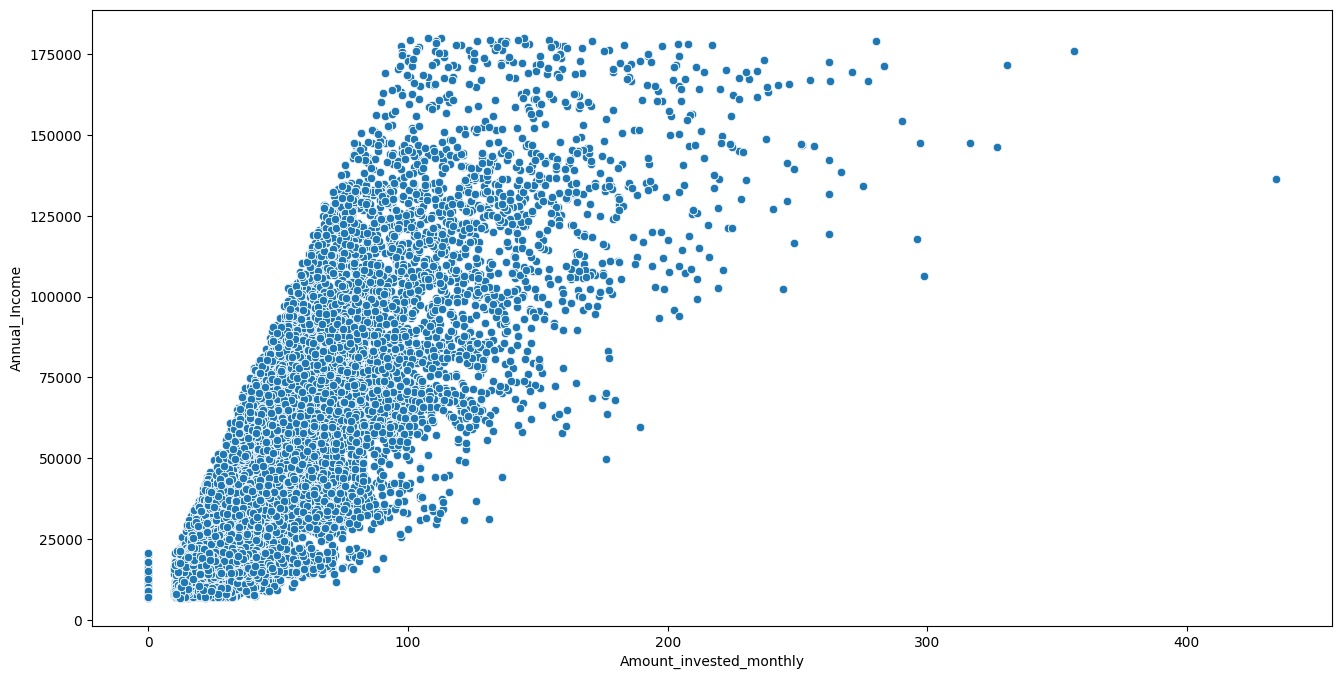

In [88]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Amount_invested_monthly',y='Annual_Income',data=df)
plt.show()

***Inference : Amount_invested_monthly Amount and Annual_Income follows a positive linear relationship, as one increases other one also increases.***

##Outlier Detection and clipping

In [89]:
Outlier_columns =  [ 'Monthly_Inhand_Salary', 'Annual_Income','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Num_Credit_Inquiries','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

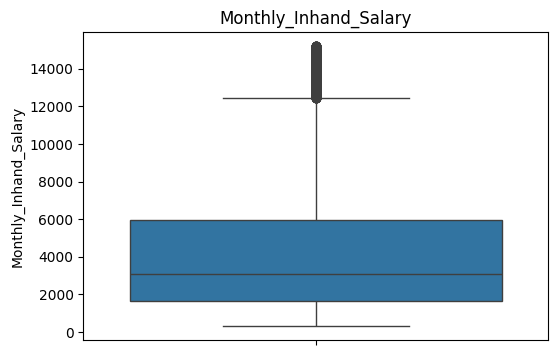

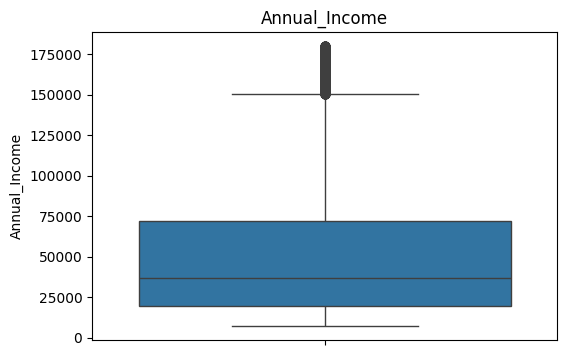

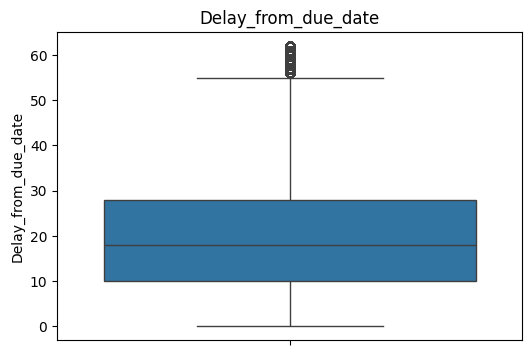

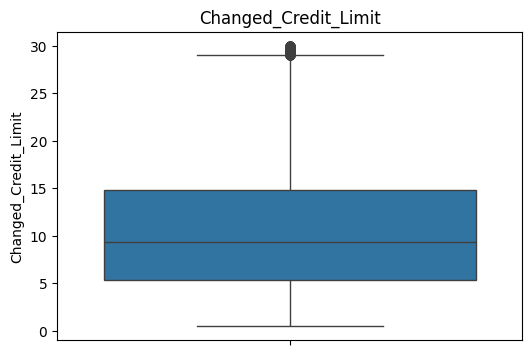

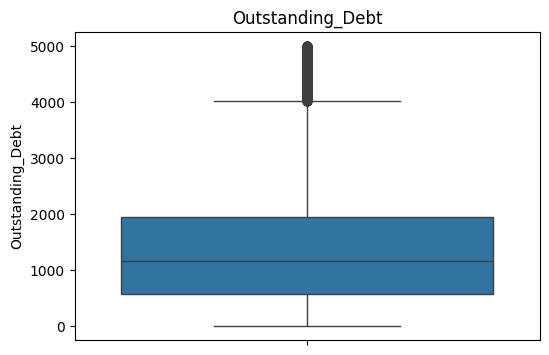

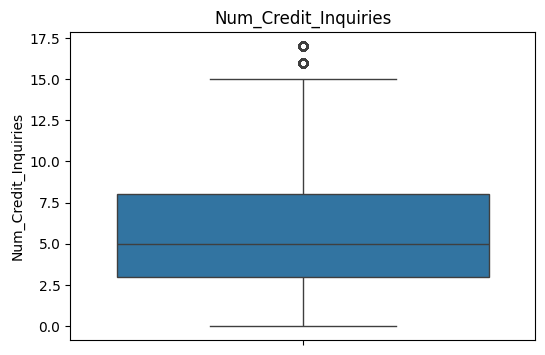

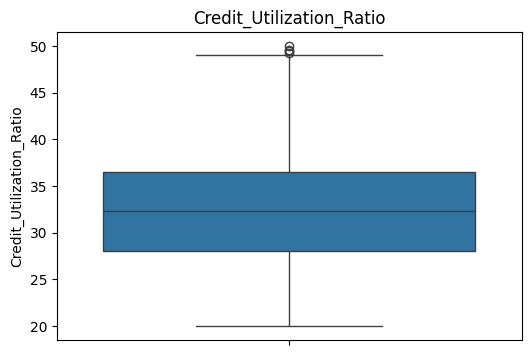

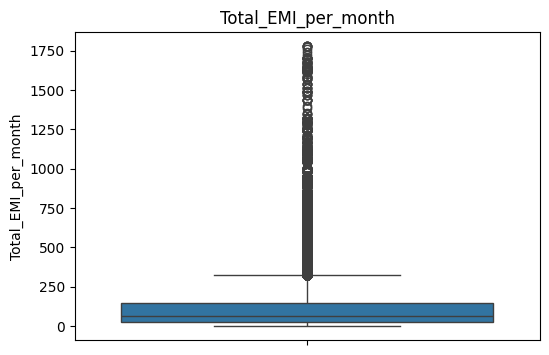

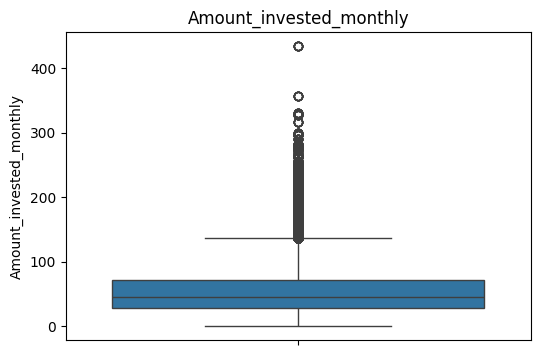

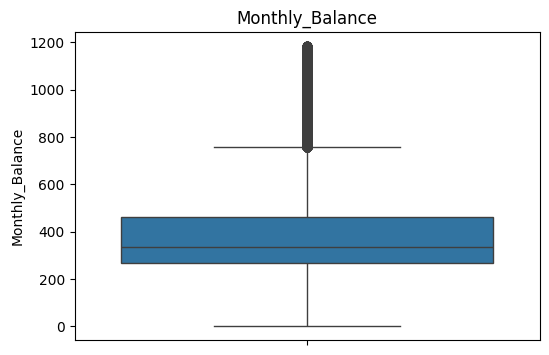

In [90]:
for i in Outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

***Inference:These are all genuine outliers.We can use transformation methods to treat Outliers.***

##Check for Skewness

In [91]:
for i in ['Monthly_Inhand_Salary', 'Annual_Income','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Num_Credit_Inquiries','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']:
  print('Skewness of',i,':',df[i].skew())

Skewness of Monthly_Inhand_Salary : 1.1286896104040092
Skewness of Annual_Income : 1.130222566741384
Skewness of Delay_from_due_date : 0.9698402706723249
Skewness of Changed_Credit_Limit : 0.7083424268261724
Skewness of Outstanding_Debt : 1.2075361955699684
Skewness of Num_Credit_Inquiries : 0.40682536214725384
Skewness of Credit_Utilization_Ratio : 0.02861652613497035
Skewness of Total_EMI_per_month : 4.041492244076896
Skewness of Amount_invested_monthly : 1.7610362306626115
Skewness of Monthly_Balance : 1.3556137797479813


***The outlier columns are skewed.***

##Transforming Credit_Mix

In [92]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

##Drop unnecessary columns

In [93]:
df.drop(['ID','Name','Customer_ID','Month','SSN','Type_of_Loan','Age','Occupation'],axis=1,inplace=True)

##Encoding

In [94]:
#Label Encoding for Target column
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [115]:
df['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  int64  
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [96]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [97]:
df = pd.get_dummies(df, dtype=int)
df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.46538,312.494089,0,0,1,0,0,0,1,0,0,0
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.46538,284.629162,0,0,1,0,0,0,0,1,0,0
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.46538,331.209863,0,0,1,0,0,0,0,0,1,0
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.46538,223.451310,0,0,1,0,0,0,0,0,0,1
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.46538,341.489231,0,0,1,0,0,1,0,0,0,0


In [98]:
df.shape

(100000, 27)

***Now we have 1 lakh rows and 27 columns.***

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Annual_Income                                       100000 non-null  float64
 1   Monthly_Inhand_Salary                               100000 non-null  float64
 2   Num_Bank_Accounts                                   100000 non-null  float64
 3   Num_Credit_Card                                     100000 non-null  float64
 4   Interest_Rate                                       100000 non-null  float64
 5   Num_of_Loan                                         100000 non-null  float64
 6   Delay_from_due_date                                 100000 non-null  float64
 7   Num_of_Delayed_Payment                              100000 non-null  float64
 8   Changed_Credit_Limit                                100000 non-nu

##Splitting Data

In [100]:
x = df.drop('Credit_Score',axis=1)
y = df['Credit_Score']

##Standard Scaling

In [101]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the LabelEncoder
sc=StandardScaler()
x=sc.fit_transform(x)

##Train Test Split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

##Logistic Regression

In [103]:
log_reg=LogisticRegression(random_state=42)
# Train the model
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6577272727272727


##Decision Tree

In [104]:
dt_clf=DecisionTreeClassifier(random_state=42)
# Train the model
dt_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.730909090909091


##Random Forest Classifier

In [105]:
rf_clf=RandomForestClassifier(random_state=42)
# Train the model
rf_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8077272727272727


##KNN

In [106]:
knn=KNeighborsClassifier(n_neighbors = 13, metric= 'euclidean', n_jobs= -1, p= 1,weights= 'distance')
# Train the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6999090909090909


##Perceptron

In [107]:
perceptron=Perceptron(random_state=42)
# Train the model
perceptron.fit(x_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.5553030303030303


##Gaussian Naive Bayes

In [108]:
xgb = XGBClassifier()
# Train the model
xgb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7682424242424243


##Light Gradient Boosting Machine (LGBM)

In [109]:
lgbm=LGBMClassifier()
# Train the model
lgbm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 67000, number of used features: 26
[LightGBM] [Info] Start training from score -1.722958
[LightGBM] [Info] Start training from score -1.241225
[LightGBM] [Info] Start training from score -0.630299
0.7433333333333333


##Adaptive Boosting

In [110]:
ada= AdaBoostClassifier()
# Train the model
ada.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ada.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.668060606060606


***Inference:Accuracy Score is high for Random forest***

##Random forest

In [111]:
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [112]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred,average='macro')],[recall_score(y_test,rf_pred,average='macro')],[f1_score(y_test,rf_pred,average='macro')]],columns=['Random Forest Classifier'])
table.index=metric
table

,Random Forest Classifier
Train Accuracy,1.000000
Test Accuracy,0.807727
Precision,0.797211
Recall,0.802139
F1 Score,0.799438


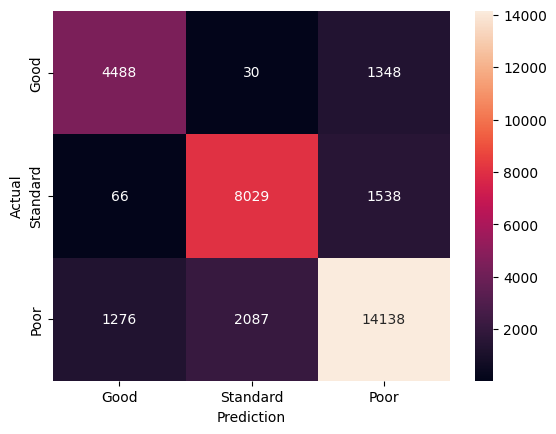

In [113]:
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good','Standard','Poor'],
            yticklabels=['Good','Standard','Poor'])
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('Actual',fontsize=10)
plt.show()

In [114]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5866
           1       0.79      0.83      0.81      9633
           2       0.83      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



***Metric values are good***